In [1]:
import pandas as pd
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train[:5] #it's in the form of a 2-dimensional array

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
#convert the 2-dimensional array to a 1-dimensional array
y_train = y_train.reshape(-1,) #the value -1 means you want to leave the first dimenstion (10000 and 50000) as it is and leave the other spot blank
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
classes = ['airplane', 'automobile', 'bird','cat','deer','dog','frog','horse', 'ship','truck']

In [8]:
classes[5]

'dog'

In [9]:
def plot_sample(X,y, index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

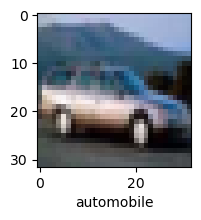

In [10]:
plot_sample(X_train,y_train,4)

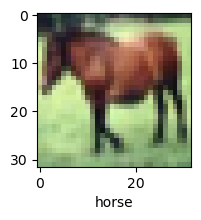

In [11]:
plot_sample(X_train,y_train,7)

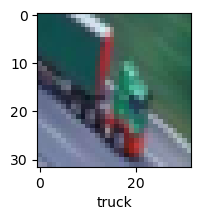

In [12]:
plot_sample(X_train,y_train,50)

#### Normalize X_train and y_train

In [13]:
X_train = X_train/255 #a pixel value ranges from 0 - 255
X_test = X_test/255

### Build an Artificial Neural Network

In [14]:
import warnings
warnings.filterwarnings('ignore')

ann =  models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000, activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10, activation='sigmoid'),
])

ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics = ['accuracy'])

ann.fit(X_train, y_train, epochs=5)



Epoch 1/5


1563/1563 [==============================] - 95s 57ms/step - loss: 1.8113 - accuracy: 0.3561
Epoch 2/5
1563/1563 [==============================] - 90s 58ms/step - loss: 1.6231 - accuracy: 0.4291
Epoch 3/5
1563/1563 [==============================] - 91s 58ms/step - loss: 1.5406 - accuracy: 0.4567
Epoch 4/5
1563/1563 [==============================] - 95s 60ms/step - loss: 1.4820 - accuracy: 0.4783
Epoch 5/5
1563/1563 [==============================] - 104s 67ms/step - loss: 1.4326 - accuracy: 0.4991


In [15]:
ann.evaluate(X_test,y_test)

313/313 [==============================] - 6s 18ms/step - loss: 1.4928 - accuracy: 0.4673


[1.4927608966827393, 0.4672999978065491]

In [16]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = ann.predict(X_test)
y_pred_classes= [np.argmax(element)for element in y_pred] 

313/313 [==============================] - 6s 17ms/step


In [17]:
print ('Classification Report: \n', classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.54      0.59      0.56      1000
           1       0.74      0.39      0.51      1000
           2       0.50      0.15      0.23      1000
           3       0.36      0.29      0.32      1000
           4       0.40      0.36      0.38      1000
           5       0.42      0.34      0.38      1000
           6       0.35      0.81      0.49      1000
           7       0.50      0.58      0.54      1000
           8       0.71      0.49      0.58      1000
           9       0.48      0.66      0.56      1000

    accuracy                           0.47     10000
   macro avg       0.50      0.47      0.45     10000
weighted avg       0.50      0.47      0.45     10000



### Build a Convoluational Neural Network

In [18]:
cnn =  models.Sequential([
    #cnn
    layers.Conv2D(filters=32, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(filters=64, kernel_size=(3,3), activation="relu"),
    layers.MaxPooling2D((2,2)),
    
    #dense
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),
])


In [19]:
cnn.compile(optimizer = 'adam',
           loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

In [20]:
cnn.fit(X_train, y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 38s 22ms/step - loss: 1.4767 - accuracy: 0.4672
Epoch 2/10
1563/1563 [==============================] - 40s 25ms/step - loss: 1.1262 - accuracy: 0.6054
Epoch 3/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.9918 - accuracy: 0.6545
Epoch 4/10
1563/1563 [==============================] - 38s 24ms/step - loss: 0.9044 - accuracy: 0.6869
Epoch 5/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.8381 - accuracy: 0.7096
Epoch 6/10
1563/1563 [==============================] - 40s 25ms/step - loss: 0.7827 - accuracy: 0.7282
Epoch 7/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.7296 - accuracy: 0.7471
Epoch 8/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.6914 - accuracy: 0.7571
Epoch 9/10
1563/1563 [==============================] - 37s 23ms/step - loss: 0.6516 - accuracy: 0.7738
Epoch 10/10
1563/1563 [==============================] - 37s 24m

In [21]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.9211 - accuracy: 0.6994


[0.9211165308952332, 0.699400007724762]

In [22]:
y_test = y_test.reshape(-1,)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

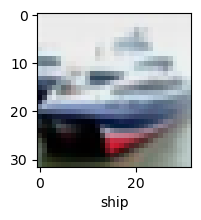

In [23]:
plot_sample(X_test,y_test,1)

In [24]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 2s 7ms/step


array([[7.3036685e-04, 2.6369636e-04, 3.2157652e-04, 8.5614580e-01,
        6.3607970e-04, 1.3358003e-01, 1.8160099e-03, 8.6083521e-05,
        6.0597141e-03, 3.6063543e-04],
       [3.6075653e-03, 9.3321363e-03, 3.3206866e-06, 6.1981268e-07,
        1.4573623e-06, 1.1976608e-08, 6.4973548e-08, 8.6959595e-09,
        9.8516548e-01, 1.8893721e-03],
       [2.2378933e-02, 5.7451922e-01, 7.8971265e-04, 1.9049343e-03,
        7.3458685e-04, 5.7257526e-04, 3.2732644e-04, 1.1709851e-03,
        5.0777275e-02, 3.4682447e-01],
       [5.4550117e-01, 2.5860064e-03, 2.9903840e-02, 5.7427837e-03,
        3.9017752e-02, 3.1252326e-05, 6.3327496e-04, 5.2543946e-05,
        3.7643540e-01, 9.5970536e-05],
       [3.4232613e-07, 4.6187633e-06, 8.8029297e-04, 8.9917555e-03,
        9.6432972e-01, 6.2738152e-05, 2.5726555e-02, 1.6876368e-06,
        2.3368568e-06, 1.4342101e-08]], dtype=float32)

In [26]:
#to find the maximum element in y_pred, use the argmax function
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 1, 0, 4]

In [27]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

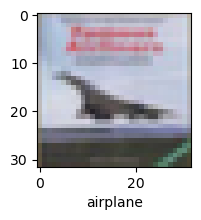

In [28]:
plot_sample(X_test,y_test,3)

In [30]:
classes[y_classes[3]]

'airplane'

### Print classification report

In [31]:
print ('Classification Report: \n', classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.73      0.74      1000
           1       0.77      0.84      0.80      1000
           2       0.70      0.46      0.56      1000
           3       0.51      0.54      0.52      1000
           4       0.61      0.69      0.64      1000
           5       0.61      0.59      0.60      1000
           6       0.77      0.77      0.77      1000
           7       0.73      0.76      0.74      1000
           8       0.81      0.80      0.80      1000
           9       0.74      0.83      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

